1. Avaiation data cleaning.

In [ ]:
#importing the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#I used Windows encoding because the files i am trying to read are not valid in UFT-8.
df = pd.read_csv('/content/AviationData.csv', encoding='windows-1252')

/tmp/ipython-input-2-1494217461.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/AviationData.csv', encoding='windows-1252')


In [ ]:
#checking top 5 columns
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [ ]:
#checking the last 5 columns
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [ ]:
#checking the dataset shape
df.shape

(88889, 31)

In [ ]:
#This data has 88889 entries and 31 columns

In [ ]:
#checking the dataset information
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Columns: 31 entries, Event.Id to Publication.Date
dtypes: float64(5), object(26)
memory usage: 21.0+ MB


In [ ]:
#The summary statistics
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [ ]:
#Describing categorical features

df.describe(include='object')

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,...,88787,81793,32023,12582,82697,16648,84397,61724,82505,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10374,24870,...,2,12,31,3,26,13590,4,12,17074,2924
top,20001214X45071,Accident,WPR23LA045,1982-05-16,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


In [ ]:
#Create a dataframe copy to be used in data cleaning
df1 = df.copy(deep = True)
df1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [ ]:
# checking unique values in each column

for column in df1:
  unique_values = df1[column].unique()
  print(f"Unique values in column '{column}','\n': {unique_values}",'\n')


Unique values in column 'Event.Id','
': ['20001218X45444' '20001218X45447' '20061025X01555' ... '20221227106497'
 '20221227106498' '20221230106513'] 

Unique values in column 'Investigation.Type','
': ['Accident' 'Incident'] 

Unique values in column 'Accident.Number','
': ['SEA87LA080' 'LAX94LA336' 'NYC07LA005' ... 'WPR23LA075' 'WPR23LA076'
 'ERA23LA097'] 

Unique values in column 'Event.Date','
': ['1948-10-24' '1962-07-19' '1974-08-30' ... '2022-12-22' '2022-12-26'
 '2022-12-29'] 

Unique values in column 'Location','
': ['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' ... 'San Manual, AZ'
 'Auburn Hills, MI' 'Brasnorte, '] 

Unique values in column 'Country','
': ['United States' nan 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND' 'Bahamas' 'MISSING' 'Pakistan' 'Angola' 'Germany'
 'Korea, Republic Of' 'Martinique' 'American Samoa' 'PACIFIC OCEAN'
 'Canada' 'Bolivia' 'Mexico' 'Dominica' 'Netherlands Antilles' 'Iceland'
 'Greece' 'Guam' 'Australia' 'CARIBBEAN SEA' '

2. Data cleaning

  2.1   Checking the colunms and dealing with mispelled columns



In [ ]:
#check the colunms
df1.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [ ]:
#All column names seem to be well spelt

In [ ]:
df1.columns = df1.columns.str.lower()#changing column names to lower case.
df1.columns

Index(['event.id', 'investigation.type', 'accident.number', 'event.date',
       'location', 'country', 'latitude', 'longitude', 'airport.code',
       'airport.name', 'injury.severity', 'aircraft.damage',
       'aircraft.category', 'registration.number', 'make', 'model',
       'amateur.built', 'number.of.engines', 'engine.type', 'far.description',
       'schedule', 'purpose.of.flight', 'air.carrier', 'total.fatal.injuries',
       'total.serious.injuries', 'total.minor.injuries', 'total.uninjured',
       'weather.condition', 'broad.phase.of.flight', 'report.status',
       'publication.date'],
      dtype='object')

In [ ]:
cols_to_drop = [
    'event.id', 'accident.number', 'registration.number', #Removing unnecesary columns
    'airport.code', 'airport.name', 'air.carrier',
    'publication.date', 'model'
]
df1.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
df1.shape

(88889, 23)

2.2 Checking the missing values and dealing with them

In [ ]:
df1.isnull().sum()

,0
investigation.type,0
event.date,0
location,52
country,226
latitude,54507
longitude,54516
injury.severity,1000
aircraft.damage,3194
aircraft.category,56602
make,63


In [ ]:
df1.dtypes #checking the data types

,0
investigation.type,object
event.date,object
location,object
country,object
latitude,object
longitude,object
injury.severity,object
aircraft.damage,object
aircraft.category,object
make,object


In [ ]:
#first we start be removing null values of non-categorical data

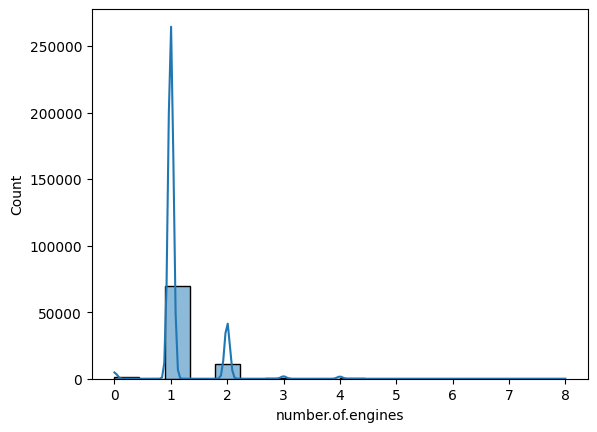

In [ ]:
sns.histplot(df1['number.of.engines'], kde=True);

In [ ]:
#(1)Combining all numerical data that contains null values and romoving them together at once
cols = ['number.of.engines', 'total.fatal.injuries', 'total.serious.injuries', 'total.minor.injuries', 'total.uninjured']

for col in cols:
    median_val = df1[col].median()
    df1[col].fillna(median_val, inplace=True)

df1.isna().sum()

/tmp/ipython-input-21-1715070109.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(median_val, inplace=True)


,0
investigation.type,0
event.date,0
location,52
country,226
latitude,54507
longitude,54516
injury.severity,1000
aircraft.damage,3194
aircraft.category,56602
make,63


In [ ]:
#Removing null values in categorical data
unknown_cols = [
    'investigation.type',
    'event.date',
    'location',
    'country',
    'latitude',
    'longitude',
    'injury.severity',
    'aircraft.damage',
    'aircraft.category',
    'make',
    'amateur.built',
    'engine.type',
    'far.description',
    'schedule',
    'purpose.of.flight',
    'weather.condition',
    'broad.phase.of.flight',
    'report.status'
]

for col in unknown_cols:
    df1[col].fillna('unknown', inplace=True)

df1.isna().sum()


/tmp/ipython-input-22-788544203.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna('unknown', inplace=True)


,0
investigation.type,0
event.date,0
location,0
country,0
latitude,0
longitude,0
injury.severity,0
aircraft.damage,0
aircraft.category,0
make,0


In [ ]:
#To reduce memory usage we use a for loop
for col in unknown_cols:
    df1[col] = df1[col].astype('category')


In [ ]:
df1.isna().sum().sum()

np.int64(0)

In [ ]:
#all the missing values have been taken care off

In [ ]:
#checking unique values
df1['aircraft.category'].unique()

['unknown', 'Airplane', 'Helicopter', 'Glider', 'Balloon', ..., 'Powered Parachute', 'Rocket', 'WSFT', 'UNK', 'ULTR']
Length: 16
Categories (16, object): ['Airplane', 'Balloon', 'Blimp', 'Glider', ..., 'Unknown', 'WSFT',
                          'Weight-Shift', 'unknown']

In [ ]:
for col in df1.columns:
    unique_vals = df1[col].unique()
    print(f"\nColumn: {col}")
    print(f"Unique values ({len(unique_vals)}): {unique_vals}")



Column: investigation.type
Unique values (2): ['Accident', 'Incident']
Categories (2, object): ['Accident', 'Incident']

Column: event.date
Unique values (14782): ['1948-10-24', '1962-07-19', '1974-08-30', '1977-06-19', '1979-08-02', ..., '2022-12-18', '2022-12-21', '2022-12-22', '2022-12-26', '2022-12-29']
Length: 14782
Categories (14782, object): ['1948-10-24', '1962-07-19', '1974-08-30', '1977-06-19', ...,
                             '2022-12-21', '2022-12-22', '2022-12-26', '2022-12-29']

Column: location
Unique values (27759): ['MOOSE CREEK, ID', 'BRIDGEPORT, CA', 'Saltville, VA', 'EUREKA, CA', 'Canton, OH', ..., 'Kellyton, AL', 'Happy Valley-Goose Bay, OF', 'San Manual, AZ', 'Auburn Hills, MI', 'Brasnorte, ']
Length: 27759
Categories (27759, object): ['(N) SKWENTNA, AK', ',', ', AO', ', Austria', ..., 'tokyo, Japan', 'unknown',
                             'unknown, Indonesia', 'unknown, Mexico']

Column: country
Unique values (220): ['United States', 'unknown', 'GULF OF MEXICO

In [ ]:
df1.value_counts()

investigation.type  event.date  location       country        latitude   longitude    injury.severity  aircraft.damage  aircraft.category  make                      amateur.built  number.of.engines  engine.type    far.description  schedule  purpose.of.flight   total.fatal.injuries  total.serious.injuries  total.minor.injuries  total.uninjured  weather.condition  broad.phase.of.flight  report.status 
Accident            2004-10-10  HARRISON, OH   United States  39.258889  -84.774167   Non-Fatal        Substantial      unknown            Cessna                    No             1.0                Reciprocating  unknown          unknown   Personal            0.0                   2.0                     1.0                   1.0              VMC                Approach               Probable Cause    2
                    1988-04-13  ATHENS, GA     United States  unknown    unknown      Non-Fatal        Substantial      unknown            Cessna                    No             1.0                Reciprocating  unknown          unknown   Personal            0.0                   0.0                     0.0                   2.0              VMC                Landing                Probable Cause    2
                    2004-08-28  Prescott, AZ   United States  34.626389  -112.244444  Fatal(2)         Destroyed        unknown            American Champion (acac)  No             1.0                Reciprocating  unknown          unknown   Personal            2.0                   0.0                     0.0                   1.0              VMC                Maneuvering            Probable Cause    2
                    1991-06-11  MOBILE, AZ     United States  unknown    unknown      Non-Fatal        Substantial      unknown            Beech                     No             1.0                Reciprocating  unknown          unknown   Instructional       0.0                   0.0                     0.0                   2.0              VMC                Taxi                   Probable Cause    2
                    2006-04-23  Chugiak, AK    United States  61.5       -149.5525    Fatal(5)         Destroyed        unknown            Cessna                    No             1.0                Reciprocating  unknown          unknown   Personal            5.0                   0.0                     0.0                   1.0              VMC                Cruise                 Probable Cause    2
                                                                                                                                                                                                                                                                                                                                                                                                                     ..
                    1992-06-25  CENTRE, AL     United States  unknown    unknown      Non-Fatal        Substantial      unknown            Bell                      No             1.0                Reciprocating  unknown          UNK       Aerial Application  0.0                   0.0                     0.0                   1.0              VMC                Maneuvering            Probable Cause    1
                                BOSTON, MA     United States  unknown    unknown      Non-Fatal        Substantial      unknown            Fairchild                 No             2.0                Turbo Prop     unknown          SCHD      Unknown             0.0                   0.0                     0.0                   21.0             VMC                Landing                Probable Cause    1
                                ABBEVILLE, AL  United States  unknown    unknown      Non-Fatal        Destroyed        unknown            Grumman                   No             1.0                Reciprocating  unknown          UNK       Aerial Application  0.0                   0.0                     1.0                   0.0 

2.3 Checking for duplicates

In [ ]:
df1.duplicated().sum()

np.int64(76)

In [ ]:
#After checking for duplicates we drop them

In [ ]:
df1.drop_duplicates(inplace=True)
df1.duplicated().sum()

np.int64(0)

2.4 Checking for outliers

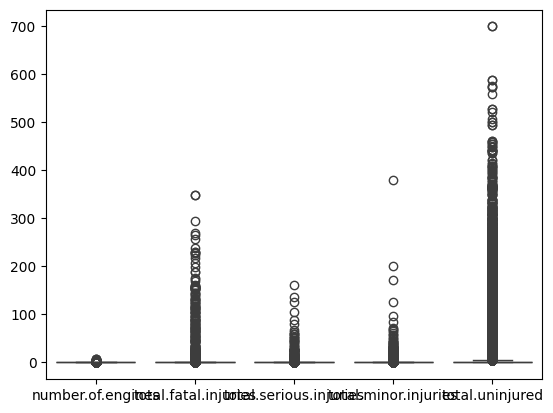

<Figure size 1000x400 with 0 Axes>

In [ ]:
#we use box plot
sns.boxplot(df1)
plt.figure(figsize=(10,4))
plt.show()

In [ ]:
df1.dtypes


,0
investigation.type,category
event.date,category
location,category
country,category
latitude,category
longitude,category
injury.severity,category
aircraft.damage,category
aircraft.category,category
make,category


<Axes: ylabel='number.of.engines'>

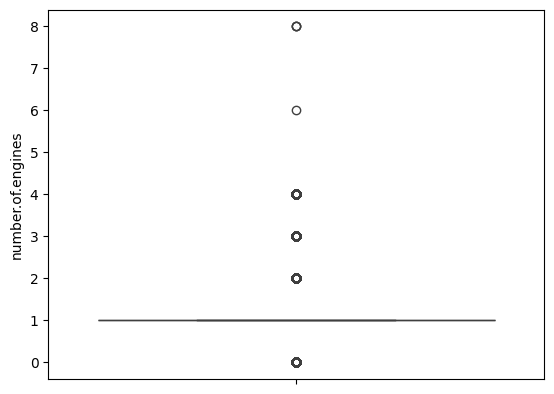

In [ ]:
sns.boxplot(df1['number.of.engines'])

In [ ]:
#Removing the outlier using the maximum quantile

#a. Get the max interquantile
max_engines = df1['number.of.engines'].quantile(0.995)
max_engines

np.float64(3.0)

In [ ]:
#checking the outliers
df1[df1['number.of.engines'] > max_engines]

,investigation.type,event.date,location,country,latitude,longitude,injury.severity,aircraft.damage,aircraft.category,make,...,far.description,schedule,purpose.of.flight,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured,weather.condition,broad.phase.of.flight,report.status
129,Accident,1982-01-19,"MIAMI, FL",United States,unknown,unknown,Non-Fatal,Substantial,Airplane,Canadair,...,Part 129: Foreign,NSCH,Unknown,0.0,0.0,0.0,6.0,VMC,Landing,Probable Cause
506,Incident,1982-03-08,"LAS VEGAS, NV",United States,unknown,unknown,Incident,unknown,Airplane,Boeing,...,Part 121: Air Carrier,UNK,Unknown,1.0,0.0,0.0,0.0,VMC,Standing,Probable Cause
558,Accident,1982-03-13,"GLENDALE, AZ",United States,unknown,unknown,Fatal(6),Destroyed,Airplane,Boeing,...,Unknown,UNK,Unknown,6.0,0.0,0.0,0.0,UNK,Approach,Probable Cause
669,Accident,1982-03-24,"MARANA, AZ",United States,unknown,unknown,Non-Fatal,Substantial,Airplane,Boeing,...,Part 91: General Aviation,unknown,Ferry,0.0,0.0,0.0,7.0,VMC,Landing,Probable Cause
1121,Accident,1982-05-08,"YALE, MI",United States,unknown,unknown,Non-Fatal,Substantial,Airplane,Piper,...,Part 91: General Aviation,unknown,Personal,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86665,Incident,2021-07-30,"Santa Cruz de la Sierra, Saint Barthelemy",Saint Barthelemy,173824S,0063825W,Non-Fatal,unknown,Airplane,BAE,...,NUSC,SCHD,unknown,0.0,0.0,0.0,97.0,unknown,unknown,unknown
87225,Accident,2021-11-29,"Miami, FL",United States,252812N,0801012W,Non-Fatal,Substantial,Airplane,BOEING,...,121,NSCH,unknown,0.0,0.0,0.0,3.0,unknown,unknown,unknown
87428,Accident,2022-02-16,"Jolon, CA",United States,355815N,1211034W,Non-Fatal,Substantial,Airplane,JOBY AERO INC,...,091,unknown,Flight Test,0.0,0.0,0.0,0.0,unknown,unknown,unknown
87804,Accident,2022-05-14,"Winters, CA",United States,383559N,1215847W,Non-Fatal,Substantial,Airplane,PYKA INC,...,091,unknown,Personal,0.0,0.0,0.0,0.0,VMC,unknown,Delamination of the uncrewed aircraft systems’...


In [ ]:
#Removing the outlier by assigning the value to a new DataFrame
df2 = df1[df1['number.of.engines'] < max_engines]

<Axes: ylabel='number.of.engines'>

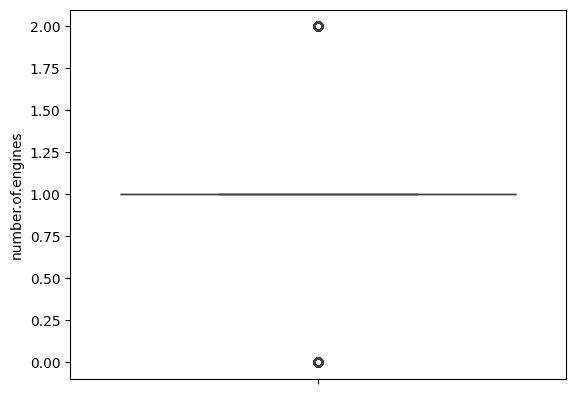

In [ ]:
#confirming removal of outlier
sns.boxplot(y='number.of.engines', data=df2)

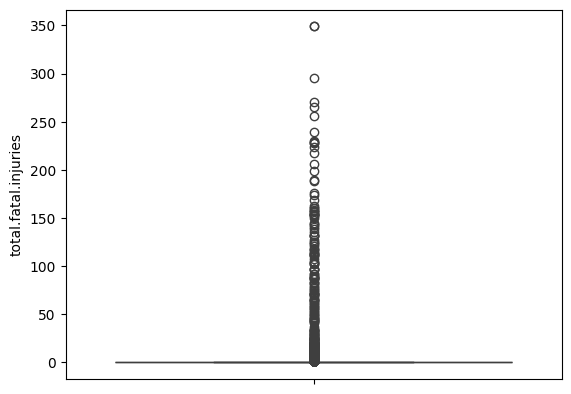

In [ ]:
#now we remove outlies from total injuries
sns.boxplot(df1['total.fatal.injuries']);

In [ ]:
#Removing the outlier using the maximum quantile

#a. Get the max interquantile
max_fatal = df1['total.fatal.injuries'].quantile(0.995)
max_fatal

np.float64(7.0)

In [ ]:
#checking the outliers
df1[df1['total.fatal.injuries'] > max_fatal]

,investigation.type,event.date,location,country,latitude,longitude,injury.severity,aircraft.damage,aircraft.category,make,...,far.description,schedule,purpose.of.flight,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured,weather.condition,broad.phase.of.flight,report.status
25,Accident,1982-01-03,"ASHLAND, VA",United States,unknown,unknown,Fatal(8),Destroyed,Airplane,Cessna,...,Part 91: General Aviation,unknown,Business,8.0,0.0,0.0,0.0,IMC,Approach,Probable Cause
84,Accident,1982-01-13,"WASHINGTON, DC",United States,unknown,unknown,Fatal(78),Destroyed,unknown,Boeing,...,unknown,SCHD,Unknown,78.0,6.0,3.0,0.0,IMC,Takeoff,Probable Cause
254,Accident,1982-02-07,"W. OF HOMESTEAD, FL",United States,unknown,unknown,Fatal(8),Destroyed,Airplane,Piper,...,Part 91: General Aviation,unknown,Personal,8.0,0.0,0.0,0.0,VMC,Cruise,Probable Cause
255,Accident,1982-02-07,"W. OF HOMESTEAD, FL",United States,unknown,unknown,Fatal(8),Destroyed,Airplane,Cessna,...,Part 91: General Aviation,unknown,Personal,8.0,0.0,0.0,0.0,VMC,Cruise,Probable Cause
334,Accident,1982-02-16,"SPRINGFIELD, KY",United States,unknown,unknown,Fatal(8),Destroyed,Airplane,Piper,...,Part 91: General Aviation,unknown,Business,8.0,0.0,0.0,0.0,IMC,Approach,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87421,Accident,2022-02-13,"Beaufort, NC",United States,344849N,0761714W,Fatal,Destroyed,Airplane,PILATUS AIRCRAFT LTD,...,091,unknown,Personal,8.0,0.0,0.0,0.0,IMC,unknown,unknown
87471,Accident,2022-02-26,"Comoros,",China,unknown,unknown,Fatal,Unknown,Airplane,CESSNA,...,NUSN,unknown,unknown,14.0,0.0,0.0,0.0,unknown,unknown,unknown
87562,Accident,2022-03-21,"Wuzhou,",China,unknown,unknown,Fatal,Destroyed,Airplane,BOEING,...,NUSC,unknown,unknown,132.0,0.0,0.0,0.0,unknown,unknown,unknown
88468,Accident,2022-09-04,"Freeland, WA",United States,475925N,0122356W,Fatal,Substantial,Airplane,DEHAVILLAND,...,135,SCHD,unknown,10.0,0.0,0.0,0.0,VMC,unknown,unknown


In [ ]:
#Removing the outlier by assigning the value to a new DataFrame
df2 = df1[df1['total.fatal.injuries'] < max_fatal]

<Axes: ylabel='total.fatal.injuries'>

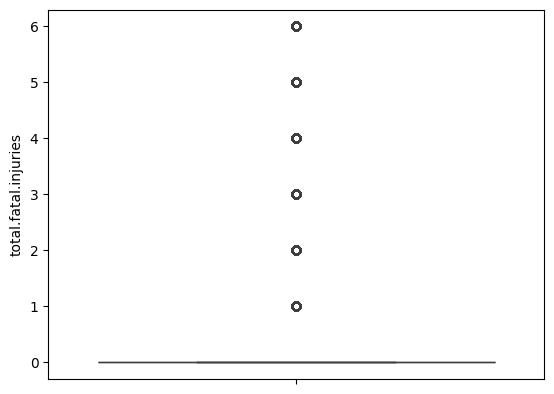

In [ ]:
#confirming removal of outlier
sns.boxplot(y='total.fatal.injuries', data=df2)

<Axes: ylabel='total.serious.injuries'>

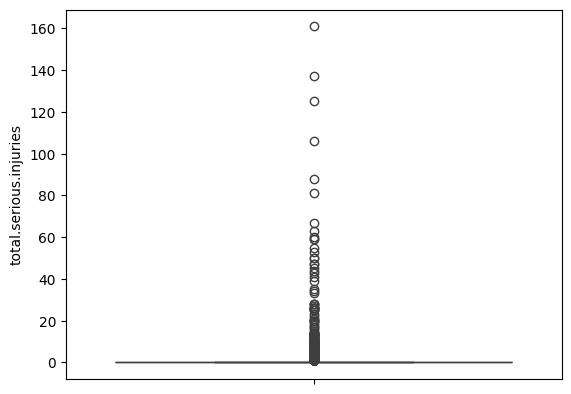

In [ ]:
#lets do for total serious injuries
sns.boxplot(df1['total.serious.injuries'])

In [ ]:
#remove the outlier after using max quantile
#Remove the outlier using the maximum quantile

#a. Get the max interquantile
max_serious = df1['total.serious.injuries'].quantile(0.995)
max_serious

np.float64(4.0)

In [ ]:
#checking the outliers
#check the outliers
df1[df1['total.serious.injuries'] > max_serious]

,investigation.type,event.date,location,country,latitude,longitude,injury.severity,aircraft.damage,aircraft.category,make,...,far.description,schedule,purpose.of.flight,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured,weather.condition,broad.phase.of.flight,report.status
84,Accident,1982-01-13,"WASHINGTON, DC",United States,unknown,unknown,Fatal(78),Destroyed,unknown,Boeing,...,unknown,SCHD,Unknown,78.0,6.0,3.0,0.0,IMC,Takeoff,Probable Cause
214,Accident,1982-02-01,"GROTON, CT",United States,unknown,unknown,Non-Fatal,Destroyed,Airplane,Beech,...,Part 135: Air Taxi & Commuter,SCHD,Unknown,0.0,5.0,2.0,0.0,IMC,Approach,Probable Cause
377,Accident,1982-02-21,"PROVIDENCE, RI",United States,unknown,unknown,Fatal(1),Destroyed,Airplane,De Havilland,...,Part 135: Air Taxi & Commuter,SCHD,Unknown,1.0,10.0,1.0,0.0,VMC,Cruise,Probable Cause
1216,Accident,1982-05-16,"HOOPER BAY, AK",United States,unknown,unknown,Non-Fatal,Destroyed,Airplane,De Havilland,...,Part 135: Air Taxi & Commuter,SCHD,Unknown,0.0,8.0,0.0,0.0,VMC,Approach,Probable Cause
1465,Accident,1982-06-06,"ST. PETERSBURG, FL",United States,unknown,unknown,Non-Fatal,Destroyed,Airplane,Douglas,...,Part 91: General Aviation,unknown,Unknown,0.0,5.0,0.0,0.0,VMC,Takeoff,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85149,Accident,2020-08-03,"Jackson, WY",United States,433515N,1104940W,Non-Fatal,unknown,Balloon,Lindstrand,...,091,NSCH,Business,0.0,13.0,2.0,1.0,VMC,unknown,The pilot’s inability to arrest the descent ra...
86455,Accident,2021-06-25,"New Orleans, LA",United States,273555N,0895654W,Non-Fatal,unknown,Airplane,AIRBUS,...,121,SCHD,unknown,0.0,8.0,1.0,185.0,unknown,unknown,unknown
87537,Accident,2022-03-16,"Baía de Camamu, BA, OF",Brazil,unknown,unknown,Fatal,unknown,unknown,SIKORSKY,...,NUSN,unknown,unknown,1.0,12.0,0.0,0.0,unknown,unknown,unknown
87861,Accident,2022-05-27,"Lahore,",Pakistan,313118N,0742413E,Serious,unknown,Airplane,BOEING,...,NUSC,unknown,unknown,0.0,6.0,1.0,121.0,unknown,unknown,unknown


In [ ]:
#Remove the outlier by assigning the value to a new DataFrame
df2 = df1[df1["total.serious.injuries"] < max_serious]

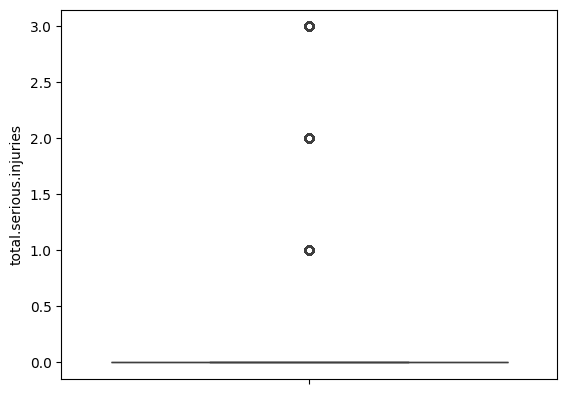

In [ ]:
#confirm removal of outlier
sns.boxplot(y='total.serious.injuries', data=df2);

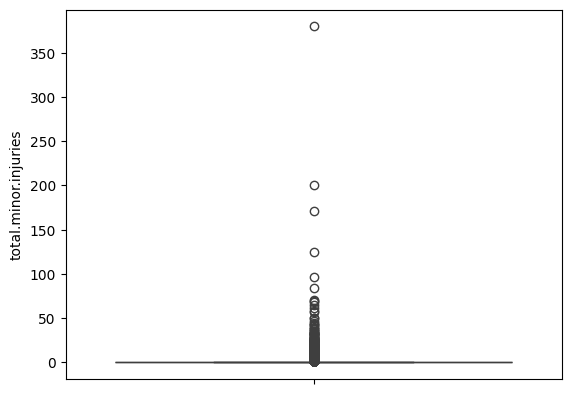

In [ ]:
#now we remove total minor injuries
sns.boxplot(df1['total.minor.injuries']);

In [ ]:
#Remove the outlier using the maximum quantile

#a. Get the max interquantile
max_minor = df1['total.minor.injuries'].quantile(0.995)
max_minor

np.float64(5.0)

In [ ]:
#check the outliers
df1[df1['total.minor.injuries'] > max_minor]

,investigation.type,event.date,location,country,latitude,longitude,injury.severity,aircraft.damage,aircraft.category,make,...,far.description,schedule,purpose.of.flight,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured,weather.condition,broad.phase.of.flight,report.status
155,Accident,1982-01-23,"BOSTON, MA",United States,unknown,unknown,Fatal(2),Destroyed,Airplane,Mcdonnell Douglas,...,Part 121: Air Carrier,SCHD,Unknown,2.0,4.0,24.0,182.0,IMC,Landing,Probable Cause
229,Accident,1982-02-03,"HAYDEN, CO",United States,unknown,unknown,Non-Fatal,Destroyed,Airplane,Mitsubishi,...,Part 91: General Aviation,unknown,Business,0.0,0.0,6.0,0.0,IMC,Landing,Probable Cause
1343,Accident,1982-05-26,"SAN FRANCISCO, CA",United States,unknown,unknown,Non-Fatal,Substantial,Airplane,Douglas,...,Part 121: Air Carrier,SCHD,Unknown,0.0,0.0,25.0,113.0,VMC,Taxi,Probable Cause
1347,Incident,1982-05-27,"NEAR GOSHEN, IN",United States,unknown,unknown,Incident,unknown,Airplane,Douglas,...,Part 121: Air Carrier,SCHD,Unknown,0.0,0.0,17.0,129.0,VMC,Cruise,Probable Cause
1969,Accident,1982-07-16,"MORTON, WY",United States,unknown,unknown,Non-Fatal,Minor,Airplane,Mcdonnell Douglas,...,Part 121: Air Carrier,SCHD,Unknown,0.0,7.0,19.0,142.0,VMC,Cruise,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84456,Accident,2020-02-05,"Istanbul, Turkey",Turkey,unknown,unknown,Fatal,Substantial,Airplane,BOEING,...,NUSC,SCHD,unknown,3.0,161.0,19.0,0.0,unknown,unknown,unknown
85473,Accident,2020-10-08,"West Palm Beach, FL",United States,265024N,0801257W,Non-Fatal,Substantial,Airplane,CESSNA,...,091,unknown,Personal,0.0,0.0,7.0,0.0,VMC,unknown,unknown
86814,Accident,2021-08-28,"Kuserua, Spain",Spain,023640S,0765617W,Non-Fatal,Unknown,Airplane,BRITTEN NORMAN,...,UNK,unknown,unknown,0.0,0.0,7.0,0.0,Unk,unknown,unknown
86864,Accident,2021-09-09,"Provincetown, MA",United States,042434N,0701242W,Non-Fatal,Substantial,Airplane,CESSNA,...,135,SCHD,unknown,0.0,0.0,7.0,0.0,IMC,unknown,unknown


In [ ]:
#Remove the outlier by assigning the value to a new DataFrame
df2 = df1[df1['total.minor.injuries'] < max_minor]

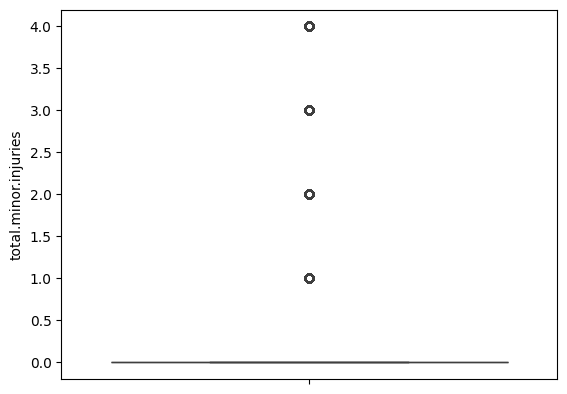

In [ ]:
#confirm removal of outlier
sns.boxplot(y='total.minor.injuries', data=df2);

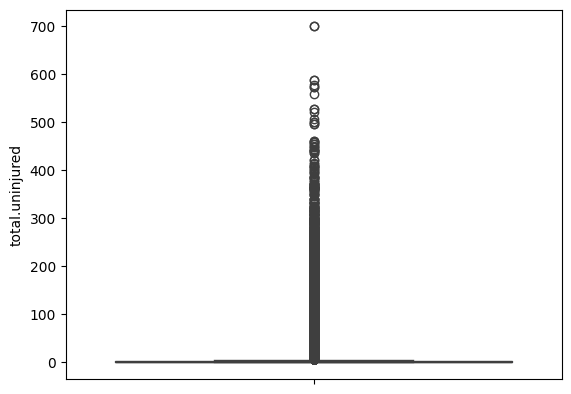

In [ ]:
#now we do for total uninjured
sns.boxplot(df1['total.uninjured']);

In [ ]:
#Removing the outlier using the maximum quantile

#a. Get the max interquantile
max_uninjured = df1['total.uninjured'].quantile(0.995)
max_uninjured

np.float64(199.94000000000233)

In [ ]:
#checking the outliers
df1[df1['total.uninjured'] > max_uninjured]

,investigation.type,event.date,location,country,latitude,longitude,injury.severity,aircraft.damage,aircraft.category,make,...,far.description,schedule,purpose.of.flight,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured,weather.condition,broad.phase.of.flight,report.status
2456,Incident,1982-08-21,"HONOLULU, HI",United States,unknown,unknown,Incident,Minor,Airplane,Mcdonnell Douglas,...,Part 121: Air Carrier,SCHD,Unknown,0.0,0.0,0.0,393.0,VMC,Takeoff,Probable Cause
3578,Incident,1982-12-30,"THERMAL, CA",United States,unknown,unknown,Incident,unknown,Airplane,Mcdonnell-douglas,...,Part 121: Air Carrier,NSCH,Unknown,0.0,0.0,14.0,203.0,VMC,Climb,Probable Cause
3686,Incident,1983-01-13,"CHICAGO, IL",United States,unknown,unknown,Incident,Minor,unknown,Mcdonnell Douglas,...,unknown,SCHD,Unknown,0.0,0.0,0.0,201.0,VMC,Landing,Probable Cause
3702,Incident,1983-01-16,"LOS ANGELES, CA",United States,unknown,unknown,Incident,Minor,unknown,Boeing,...,unknown,unknown,Personal,0.0,0.0,0.0,412.0,VMC,Taxi,Probable Cause
4149,Incident,1983-03-18,"LOS ANGELES, CA",United States,unknown,unknown,Incident,Minor,Airplane,Lockheed,...,Part 121: Air Carrier,SCHD,Unknown,0.0,0.0,0.0,588.0,VMC,Standing,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88319,Accident,2022-08-06,"Atlanta, GA",United States,unknown,unknown,Non-Fatal,unknown,unknown,BOEING,...,121,SCHD,unknown,0.0,0.0,0.0,203.0,unknown,unknown,unknown
88563,Incident,2022-09-22,"Los Angeles, CA",United States,335630N,1182431W,Non-Fatal,unknown,Airplane,AIRBUS,...,121,SCHD,unknown,0.0,0.0,0.0,290.0,Unk,unknown,unknown
88605,Incident,2022-10-01,"Manila,",Philippines,143553N,0120591E,Non-Fatal,Minor,Airplane,BOEING,...,NUSC,unknown,unknown,0.0,0.0,0.0,368.0,unknown,unknown,unknown
88726,Incident,2022-10-27,"Buenos Aires,",Argentina,unknown,unknown,Non-Fatal,unknown,unknown,BOEING,...,129,unknown,unknown,0.0,0.0,0.0,268.0,unknown,unknown,unknown


In [ ]:
#Remove the outlier by assigning the value to a new DataFrame
df2 = df1[df1["total.uninjured"] < max_uninjured]

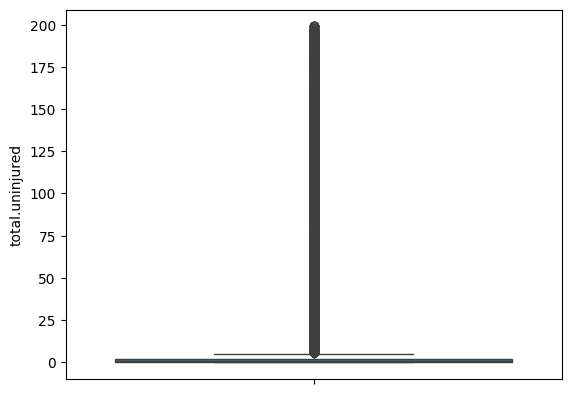

In [ ]:
#confirm removal of outlier
sns.boxplot(y='total.uninjured', data=df2);

In [ ]:
#now we are done with removing outliers

2.5 saving the clean dataset

In [ ]:
df2.to_csv("CleanAviationData.csv", index=False)

2.6 Exploratory data analysis

In [ ]:
#loading the clean Dataset and create a adataframe
data = pd.read_csv('CleanAviationData.csv')
data.head()

,investigation.type,event.date,location,country,latitude,longitude,injury.severity,aircraft.damage,aircraft.category,make,...,far.description,schedule,purpose.of.flight,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured,weather.condition,broad.phase.of.flight,report.status
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,unknown,unknown,Fatal(2),Destroyed,unknown,Stinson,...,unknown,unknown,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,unknown,unknown,Fatal(4),Destroyed,unknown,Piper,...,unknown,unknown,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,Accident,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Fatal(3),Destroyed,unknown,Cessna,...,unknown,unknown,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause
3,Accident,1977-06-19,"EUREKA, CA",United States,unknown,unknown,Fatal(2),Destroyed,unknown,Rockwell,...,unknown,unknown,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,Accident,1979-08-02,"Canton, OH",United States,unknown,unknown,Fatal(1),Destroyed,unknown,Cessna,...,unknown,unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause


1.Univariate analysis

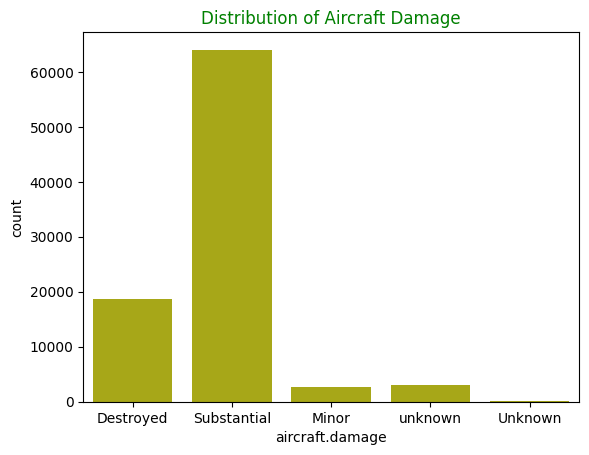

In [ ]:
#checking distribution of aircraft damage
damage_counts = data['aircraft.damage'].value_counts()
damage_counts
sns.countplot(x = data['aircraft.damage'], color='y' );
plt.title('Distribution of Aircraft Damage', color='g');
plt.show()

In [ ]:
# This plot shows the distribution of aircraft damage types reported in the dataset.
# Most incidents are categorized as "Substantial", indicating significant structural damage
# that required major repair. A notable number of cases also show "Destroyed" aircraft,
# while fewer incidents fall under "Minor" or "None".
# This suggests that a large portion of aviation accidents result in serious damage to aircraft.

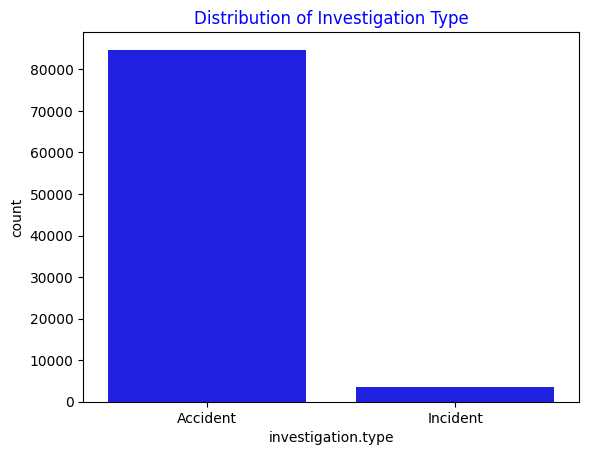

In [ ]:
#checking investigation type
investigation_counts = data['investigation.type'].value_counts()
investigation_counts
sns.countplot(x = data['investigation.type'], color='b' );
plt.title('Distribution of Investigation Type', color='b');
plt.show()

In [ ]:
# The distribution shows that "Accident" cases are more frequent than "Incident" cases.
# This suggests that the dataset contains a higher number of serious events where damage,
# injury, or aircraft loss occurred, rather than minor or precautionary investigations.

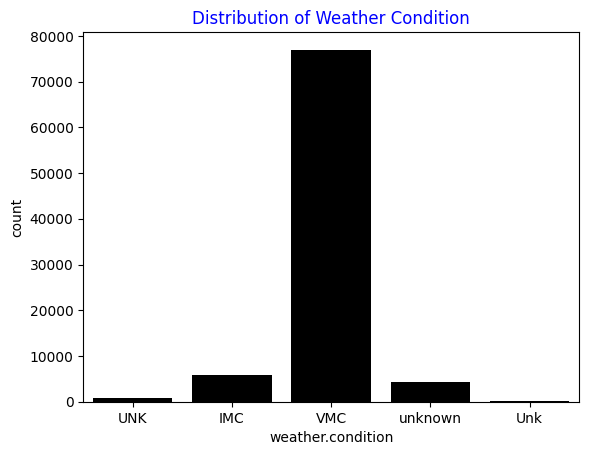

In [ ]:
#checking for weather condition
weather_counts = data['weather.condition'].value_counts()
weather_counts
sns.countplot(x = data['weather.condition'], color='k' );
plt.title('Distribution of Weather Condition', color='b');
plt.show()

In [ ]:
# Measures of Central tendancy
columns = [['number.of.engines', 'total.fatal.injuries', 'total.serious.injuries', 'total.minor.injuries', 'total.uninjured']]
for column in columns:
  print("\n\n")
  print("mean is: \n"+ str(round(data[column].mean(), 2)))
  print("\n\n")
  print("median is:\n "+ str(data[column].median()))
  print("\n\n")
  print("mode is:\n " + str(data[column].mode()))
  print("\n\n")
  print("skew is:\n " + str(data[column].skew()))
  print("\n\n")
  print("kurtosis is:\n " + str(data[column].kurtosis()))





mean is: 
number.of.engines         1.13
total.fatal.injuries      0.57
total.serious.injuries    0.24
total.minor.injuries      0.30
total.uninjured           3.61
dtype: float64



median is:
 number.of.engines         1.0
total.fatal.injuries      0.0
total.serious.injuries    0.0
total.minor.injuries      0.0
total.uninjured           1.0
dtype: float64



mode is:
    number.of.engines  total.fatal.injuries  total.serious.injuries  \
0                1.0                   0.0                     0.0   

   total.minor.injuries  total.uninjured  
0                   0.0              1.0  



skew is:
 number.of.engines           2.613788
total.fatal.injuries       35.230428
total.serious.injuries     53.809914
total.minor.injuries      106.802417
total.uninjured             7.854768
dtype: float64



kurtosis is:
 number.of.engines            13.012040
total.fatal.injuries       1544.084474
total.serious.injuries     4416.289478
total.minor.injuries      18144.248365
total.uninj

2.Bivariate analysis

weather.condition    IMC  UNK  Unk    VMC  unknown
investigation.type                                
Accident            5699  748  211  74989     3089
Incident             236   91   42   1972     1291


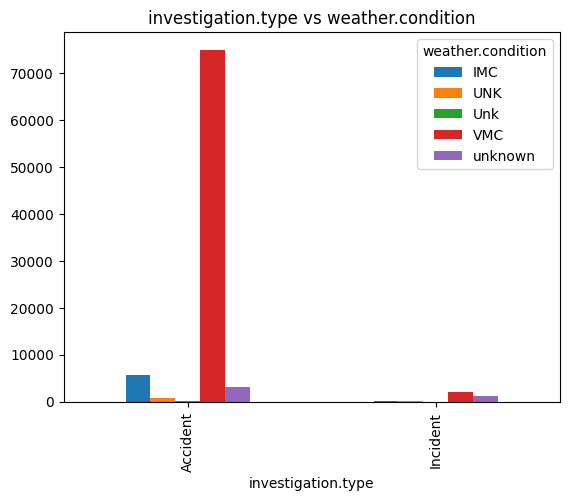

In [ ]:
# distribution of weather crosstab
weather_counts = pd.crosstab(data['investigation.type'], data['weather.condition'])
print(weather_counts)
weather_counts.plot(kind="bar")
plt.title("investigation.type vs weather.condition");

In [ ]:
#he bivariate analysis between investigation.type and weather.condition shows that most events occurred under VMC (Visual Meteorological Conditions), regardless of whether they were classified as incidents or accidents.
#However, the proportion of accidents appears slightly higher under IMC (Instrument conditions) compared to incidents, suggesting that poor weather may be more strongly associated with accidents.
#That said, a large number of cases have UNKNOWN weather conditions, which may limit the strength of this conclusion.

aircraft.damage     Destroyed  Minor  Substantial  Unknown  unknown
investigation.type                                                 
Accident                18588    705        63981       97     1365
Incident                    8   1958           39       22     1605


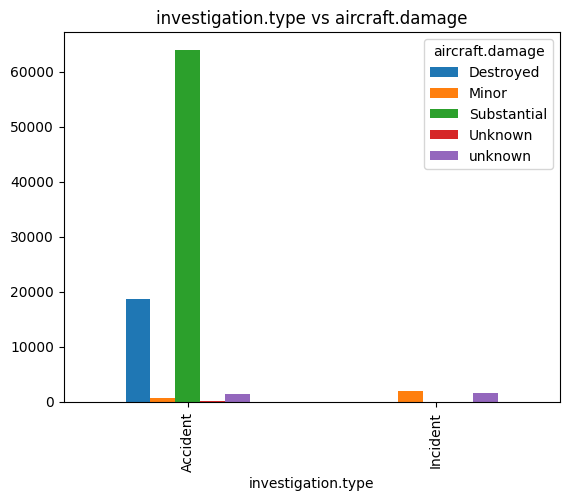

In [ ]:
#cross tab for air craft damage and investigation type
damage_counts = pd.crosstab(data['investigation.type'], data['aircraft.damage'])
print(damage_counts)
damage_counts.plot(kind="bar")
plt.title("investigation.type vs aircraft.damage");


In [ ]:
#The bivariate analysis between investigation.type and aircraft.damage shows a clear trend:
#Accidents are far more likely to result in severe damage such as "Substantial" or "Destroyed", while "Incidents" are more commonly associated with "Minor" or "No Damage".
#This aligns with expectations, as accidents typically involve more serious events compared to incidents.
#The data supports the reliability of the investigation type classification in reflecting the severity of damage.

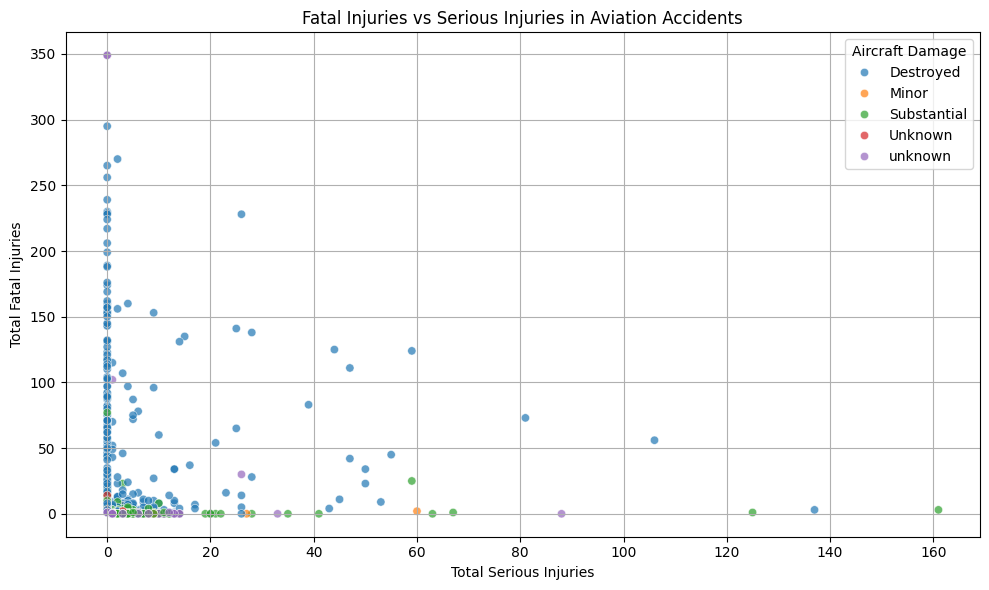

<Axes: xlabel='total.serious.injuries', ylabel='total.fatal.injuries'>

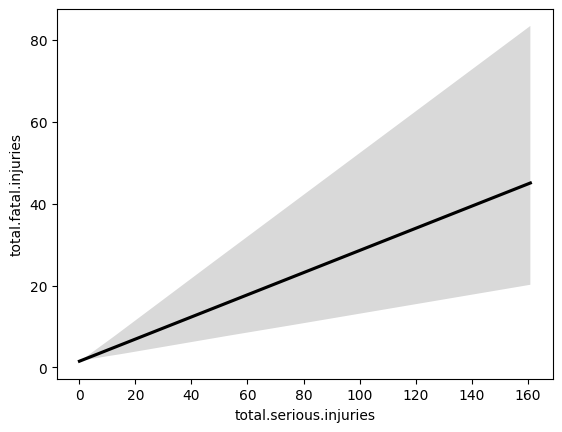

In [ ]:
# Filter out rows where both values are NaN or 0 (optional but helps clarity)
df_plot = df2[(df2['total.serious.injuries'] > 0) | (df2['total.fatal.injuries'] > 0)]

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_plot,
    x='total.serious.injuries',
    y='total.fatal.injuries',
    hue='aircraft.damage',  # Optional: color by damage type
    alpha=0.7
)

# Add plot details
plt.title('Fatal Injuries vs Serious Injuries in Aviation Accidents')
plt.xlabel('Total Serious Injuries')
plt.ylabel('Total Fatal Injuries')
plt.legend(title='Aircraft Damage', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()
sns.regplot(
    data=df_plot,
    x='total.serious.injuries',
    y='total.fatal.injuries',
    scatter=False,
    color='black'
)



In [ ]:
#feature engineering, extracting year and month from month date
df2['event.date'] = pd.to_datetime(df1['event.date'], errors='coerce')
df2['event_year'] = df2['event.date'].dt.year
df2['event_month'] = df2['event.date'].dt.month
df2.head()


/tmp/ipython-input-73-2515865399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['event.date'] = pd.to_datetime(df1['event.date'], errors='coerce')
/tmp/ipython-input-73-2515865399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['event_year'] = df2['event.date'].dt.year
/tmp/ipython-input-73-2515865399.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,investigation.type,event.date,location,country,latitude,longitude,injury.severity,aircraft.damage,aircraft.category,make,...,purpose.of.flight,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured,weather.condition,broad.phase.of.flight,report.status,event_year,event_month
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,unknown,unknown,Fatal(2),Destroyed,unknown,Stinson,...,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,1948,10
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,unknown,unknown,Fatal(4),Destroyed,unknown,Piper,...,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1962,7
2,Accident,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Fatal(3),Destroyed,unknown,Cessna,...,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,1974,8
3,Accident,1977-06-19,"EUREKA, CA",United States,unknown,unknown,Fatal(2),Destroyed,unknown,Rockwell,...,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,1977,6
4,Accident,1979-08-02,"Canton, OH",United States,unknown,unknown,Fatal(1),Destroyed,unknown,Cessna,...,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,1979,8


In [ ]:
##combining all total injuries
df2['Total.injuries'] = df2['total.fatal.injuries'] + df2['total.serious.injuries'] + df2['total.minor.injuries']
df2.head()

/tmp/ipython-input-74-2771762364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total.injuries'] = df2['total.fatal.injuries'] + df2['total.serious.injuries'] + df2['total.minor.injuries']


,investigation.type,event.date,location,country,latitude,longitude,injury.severity,aircraft.damage,aircraft.category,make,...,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured,weather.condition,broad.phase.of.flight,report.status,event_year,event_month,Total.injuries
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,unknown,unknown,Fatal(2),Destroyed,unknown,Stinson,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,1948,10,2.0
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,unknown,unknown,Fatal(4),Destroyed,unknown,Piper,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1962,7,4.0
2,Accident,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Fatal(3),Destroyed,unknown,Cessna,...,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,1974,8,3.0
3,Accident,1977-06-19,"EUREKA, CA",United States,unknown,unknown,Fatal(2),Destroyed,unknown,Rockwell,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,1977,6,2.0
4,Accident,1979-08-02,"Canton, OH",United States,unknown,unknown,Fatal(1),Destroyed,unknown,Cessna,...,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,1979,8,3.0


In [ ]:
df2.shape

(88368, 26)

In [ ]:
df1.shape

(88813, 23)

In [ ]:
df2.to_csv("CleanAviationData_final.csv", index=False)

In [ ]:
df = pd.read_csv('/content/CleanAviationData_final.csv')

In [ ]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88368 entries, 0 to 88367
Columns: 26 entries, investigation.type to Total.injuries
dtypes: float64(6), int64(2), object(18)
memory usage: 17.5+ MB
